#### 영역 찾기

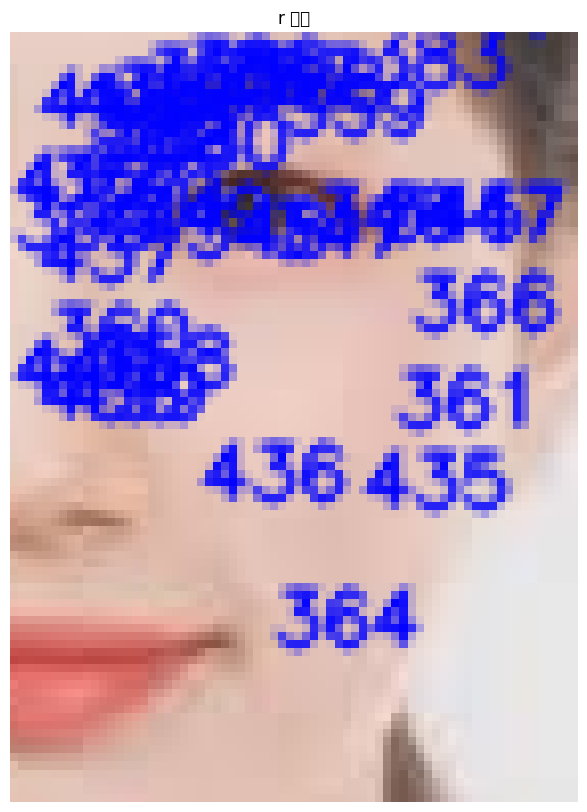

In [245]:
def crop_and_show_part(image_path, part='eye'):
    # 이미지 불러오기
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 랜드마크 탐지
    results = face_mesh.process(image_rgb)
    if not results.multi_face_landmarks:
        print("❌ 얼굴 인식 실패")
        return

    face_landmarks = results.multi_face_landmarks[0]
    
    # 부위별 번호 정의 (필요 시 수정)
    part_indices = {
        'f': [8, 9, 10, 107, 66, 105, 63, 70, 71, 109, 108, 151, 296, 334, 293, 300, 299,
            383, 368, 389, 356, 337, 276, 283, 282, 295, 285, 336]
            + list(range(65, 69)) + list(range(155, 164)),

        'n': [0, 1, 2, 5, 6, 45, 275, 274, 273, 272, 271, 164, 165, 97, 98, 99, 
            2, 94, 95, 96, 240, 218, 219, 220, 237, 218, 134,399, 398],

        'l': [116, 117, 118, 119, 120, 121, 128, 129, 130, 131, 132,
            226, 113, 225, 224, 223, 222, 221, 189, 190, 137, 138, 139],

        'r': [345, 346, 347, 348, 349, 350, 357, 358, 359, 360, 361,
            447, 366, 440, 439, 438, 437, 436, 435, 414, 413, 412, 399, 398, 364]+ list(range(380,390)),

        'm':  [0, 17, 170, 175 ,364,335, 172, 152, 395,396,397,400] 
    }

    if part not in part_indices:
        print(f"부위 이름 잘못됨: {part}")
        return

    # 해당 부위만 좌표 수집
    points = [
        (int(face_landmarks.landmark[i].x * image.shape[1]),
         int(face_landmarks.landmark[i].y * image.shape[0]))
        for i in part_indices[part]
    ]

    # 해당 부위 영역 잘라내기
    x_min = min(p[0] for p in points)
    x_max = max(p[0] for p in points)
    y_min = min(p[1] for p in points)
    y_max = max(p[1] for p in points)

    cropped = image[y_min-10:y_max+10, x_min-10:x_max+10].copy()

    # 확대해서 번호 표시
    for idx, (x, y) in zip(part_indices[part], points):
        cv2.putText(cropped, str(idx), (x - x_min, y - y_min),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1, cv2.LINE_AA)

    # 시각화
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'{part} 확대')
    plt.show()

# 예시 실행
crop_and_show_part('./test1.jpeg', part='r')  # 부위: 'left_eye', 'right_eye', 'nose', 'mouth'

In [3]:
plt.rc('font', family='NanumGothic') 

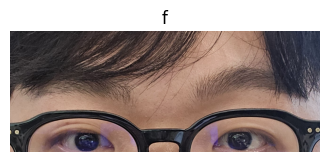

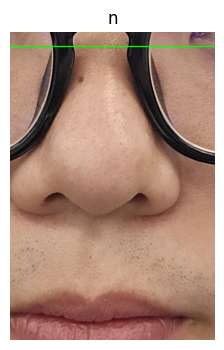

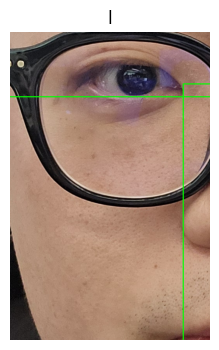

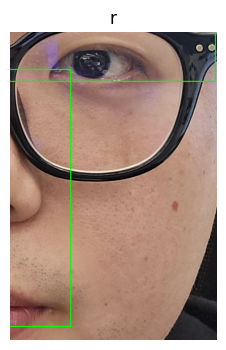

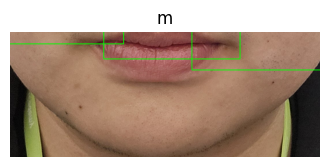

c:\acne\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\acne\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\acne\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\acne\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\acne\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


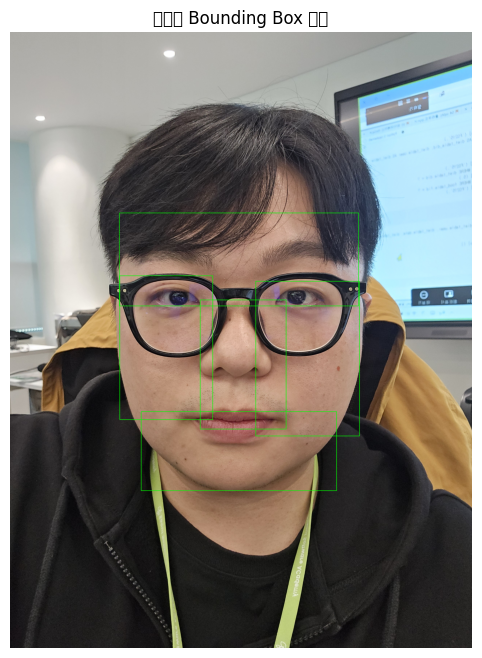

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Mediapipe 초기화
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True)

# 부위별 랜드마크 번호
part_indices = {
    'f': [8, 9, 10, 107, 66, 105, 63, 70, 71, 109, 108, 151, 296, 334, 293, 300, 299,
          383, 368, 389, 356, 337, 276, 283, 282, 295, 285, 336]
          + list(range(65, 69)) + list(range(155, 164)),

    'n': [0, 1, 2, 5, 6, 45, 275, 274, 273, 272, 271, 164, 165, 97, 98, 99, 
          2, 94, 95, 96, 240, 218, 219, 220, 237, 218, 134, 399, 398],

    'l': [116, 117, 118, 119, 120, 121, 128, 129, 130, 131, 132,
          226, 113, 225, 224, 223, 222, 221, 189, 190, 137, 138, 139],

    'r': [345, 346, 347, 348, 349, 350, 357, 358, 359, 360, 361,
          447, 366, 440, 439, 438, 437, 436, 435, 414, 413, 412, 364]
          + list(range(380, 390)),

    'm': [0, 17, 170, 175, 364, 335, 172, 152, 395, 396, 397, 400, 
          61, 146, 91, 181, 84, 17, 314, 402, 13, 14, 15, 86, 178, 87]
}

# 부위별 사각형 크롭
def get_part_bounding_box(image, landmarks, indices):
    points = np.array([
        [int(landmarks.landmark[i].x * image.shape[1]),
         int(landmarks.landmark[i].y * image.shape[0])]
        for i in indices
    ])
    x_min, y_min = points.min(axis=0)
    x_max, y_max = points.max(axis=0)

    cropped = image[y_min:y_max, x_min:x_max].copy()

    return cropped, (x_min, y_min, x_max, y_max)

# 부위별 시각화
def detect_and_visualize_parts_bbox(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = face_mesh.process(image_rgb)
    if not results.multi_face_landmarks:
        print("얼굴 인식 실패")
        return

    face_landmarks = results.multi_face_landmarks[0]

    for part, indices in part_indices.items():
        cropped_part, bbox = get_part_bounding_box(image, face_landmarks, indices)

        plt.figure(figsize=(4, 4))
        plt.imshow(cv2.cvtColor(cropped_part, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'{part}')
        plt.show()

        # 선택사항: 원본 이미지에 사각형 표시 (확인용)
        x_min, y_min, x_max, y_max = bbox
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # 전체 얼굴에 박스 표시 결과 (옵션)
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('부위별 Bounding Box 표시')
    plt.show()

# 테스트 실행
detect_and_visualize_parts_bbox('./test0.jpg')  # 경로 맞춰서 사용
